In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#read in the data using pandas
df = pd.read_csv('diabetes.csv')
#check data has been read in properly
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [4]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter=1000)
# Fit the classifier to the data
logmodel.fit(x,y)

LogisticRegression(max_iter=1000)

In [5]:
# Use score method to get accuracy of the model
# Warning: This is not a correct way of training a model, the data should be split into training and test set
score = logmodel.score(x, y)
print(score)

0.78125


In [6]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":x.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -8.365561
1               Pregnancies      0.122477
2                   Glucose      0.035113
3             BloodPressure     -0.013300
4             SkinThickness      0.000785
5                   Insulin     -0.001174
6                       BMI      0.089655
7  DiabetesPedigreeFunction      0.867400
8                       Age      0.014993


In [7]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [8]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter=1000)
# Fit the classifier to the data
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [9]:
#Make prediction using test data
y_pred = logmodel.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [11]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [12]:
# Use score method to get test accuracy of model
score = logmodel.score(x_test, y_test)
print(score)

0.7857142857142857


In [13]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":x.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -8.397314
1               Pregnancies      0.134739
2                   Glucose      0.034464
3             BloodPressure     -0.016899
4             SkinThickness     -0.004598
5                   Insulin     -0.000594
6                       BMI      0.096827
7  DiabetesPedigreeFunction      1.132075
8                       Age      0.014420


In [14]:
# Use score method to get training accuracy of model
score = logmodel.score(x_train, y_train)
print(score)

0.7850162866449512


In [15]:
#import metrics class
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[92,  8],
       [25, 29]], dtype=int64)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.7837837837837838
Recall: 0.5370370370370371


In [17]:
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
y_pred_proba

array([0.07405718, 0.16900467, 0.04360815, 0.46436846, 0.28973637,
       0.22723696, 0.02975138, 0.09709771, 0.77739573, 0.05024577,
       0.21976683, 0.05514578, 0.74207662, 0.02975558, 0.04932841,
       0.28647166, 0.27810548, 0.52527893, 0.13816398, 0.68410373,
       0.74463532, 0.0827076 , 0.43697502, 0.02799204, 0.2277195 ,
       0.16755609, 0.47661979, 0.08709103, 0.0494368 , 0.06281137,
       0.0634471 , 0.00328026, 0.02679425, 0.24141258, 0.70474241,
       0.86924392, 0.1748403 , 0.85556743, 0.15919728, 0.14983175,
       0.08867871, 0.87626376, 0.14311563, 0.45715443, 0.2518987 ,
       0.2287747 , 0.24372704, 0.11728634, 0.52278328, 0.9219189 ,
       0.04007261, 0.19159022, 0.64810971, 0.4068959 , 0.21216649,
       0.29353023, 0.15179756, 0.03190678, 0.66563495, 0.71121231,
       0.0588063 , 0.24043392, 0.03062888, 0.09004027, 0.97732829,
       0.10395695, 0.00183601, 0.81195576, 0.03698553, 0.40601167,
       0.63413833, 0.0443139 , 0.39077579, 0.39867653, 0.48595

In [22]:
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype('float')
y_pred

array([0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0.])

In [23]:
metrics.confusion_matrix(y_test, y_pred)

array([[57, 43],
       [ 8, 46]], dtype=int64)

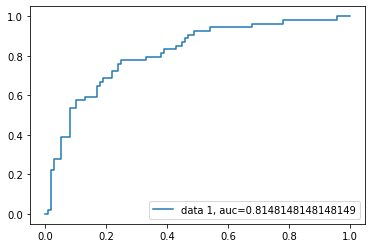

In [24]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()